# Population Density of Mexican States and Municipalities

This Notebook downloads Geopandas GeoDataFrames for States (admin1) and Municipalities (admin2) derived from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/temas/mg/).

For details how these dataframe were created, see the [mexican-boundaries](https://github.com/sbl-sdsc/mexico-boundaries) GitHub project.

In [1]:
from io import BytesIO
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import IPython
print(IPython.sys_info())
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
%reload_ext autoreload
%autoreload 2


{'commit_hash': '30cd45eb7',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'D:\\Users\\angel\\miniconda3\\Lib\\site-packages\\IPython',
 'ipython_version': '7.24.1',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19041-SP0',
 'sys_executable': 'D:\\Users\\angel\\miniconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit '
                '(AMD64)]'}


In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Boundaries of Mexican States

Read boundary polygons for Mexican states from shapefile

In [3]:
admin1_url = 'https://raw.githubusercontent.com/sbl-sdsc/mexico-boundaries/main/data/mexico_admin1.parquet'

In [4]:
resp = urlopen(admin1_url)
admin1 = gpd.read_parquet(BytesIO(resp.read()))

Calculate the area of each state (convert area from m^2 to km^2

In [5]:
admin1.crs

<Projected CRS: PROJCRS["MEXICO_ITRF_2008_LCC",BASEGEOGCRS["MEXICO ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
admin1['area_sqkm'] = admin1['geometry'].area/ 10**6

In [7]:
admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986


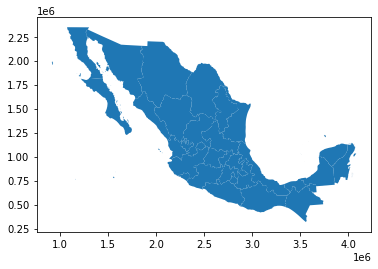

In [8]:
admin1.plot();

## Map of Population by State

Get population from COVID-19 data files

In [9]:
population_admin1 = pd.read_csv('../Data/Casos_Diarios_Estado_Nacional_Defunciones_20210621.csv', 
                                usecols=['cve_ent', 'poblacion', 'nombre'])

In [10]:
population_admin1.head()

,cve_ent,poblacion,nombre
0,1,1434635,AGUASCALIENTES
1,2,3634868,BAJA CALIFORNIA
2,3,804708,BAJA CALIFORNIA SUR
3,4,1000617,CAMPECHE
4,7,5730367,CHIAPAS


Add CVE_ENT state code column (example: convert 1 -> 01)

In [11]:
population_admin1['CVE_ENT'] = population_admin1['cve_ent'].apply(lambda i: f'{i:02d}')

In [12]:
population_admin1.head()

,cve_ent,poblacion,nombre,CVE_ENT
0,1,1434635,AGUASCALIENTES,01
1,2,3634868,BAJA CALIFORNIA,02
2,3,804708,BAJA CALIFORNIA SUR,03
3,4,1000617,CAMPECHE,04
4,7,5730367,CHIAPAS,07


Merge the geo dataframe with the population dataframe using the common CVE_ENT column

In [13]:
df_admin1 = admin1.merge(population_admin1, on='CVE_ENT')

In [14]:
df_admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm,cve_ent,poblacion,nombre
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,1,1434635,AGUASCALIENTES
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324,2,3634868,BAJA CALIFORNIA
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326,3,804708,BAJA CALIFORNIA SUR
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636,4,1000617,CAMPECHE
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986,5,3218720,COAHUILA


Plot population data

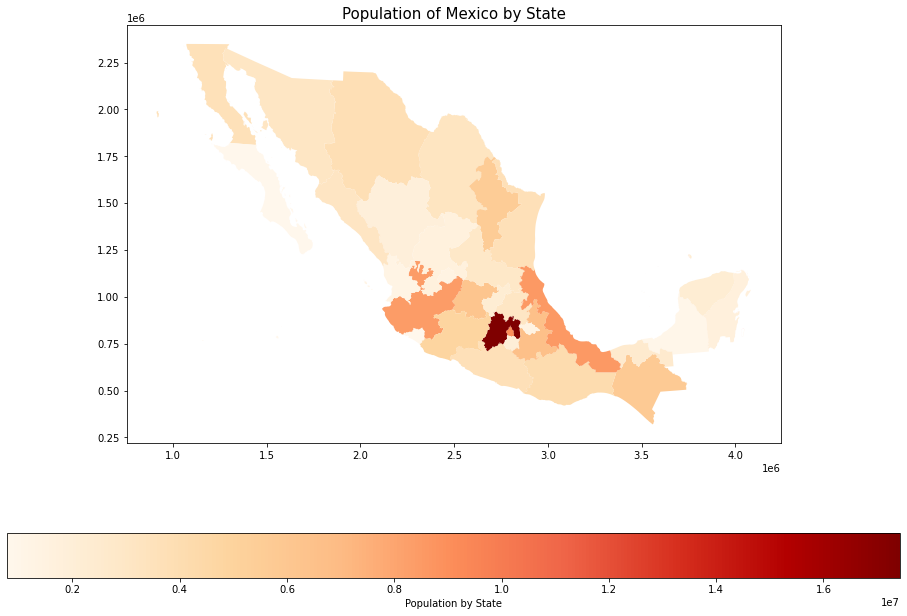

In [15]:
title = 'Population of Mexico by State'
ax1 = df_admin1.plot(column='poblacion', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Population by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);